In [1]:
import mikeio
from watobs import DHIAltimetryRepository
import matplotlib.pyplot as plt
import os
api_key = os.getenv('DHI_ALTIMETRY_API_KEY')

In [2]:
df = mikeio.open("../output/Area.dfsu")
area_box = [df.geometry.element_coordinates[:,0].min(),df.geometry.element_coordinates[:,1].min(),
            df.geometry.element_coordinates[:,0].max(),df.geometry.element_coordinates[:,1].max()]
area_str = f"bbox={area_box[0]},{area_box[1]},{area_box[2]},{area_box[3]}"


start = "2022-01-01"
end = "2024-01-01"

In [3]:
# Set up altimetry repository
repo = DHIAltimetryRepository(api_key=api_key)
repo.get_satellites()

,long_name
short_name,
gs,Geosat
e1,ERS-1
tx,TOPEX
pn,Poseidon
e2,ERS-2
g1,GFO
j1,Jason-1
n1,Envisat
j2,Jason-2


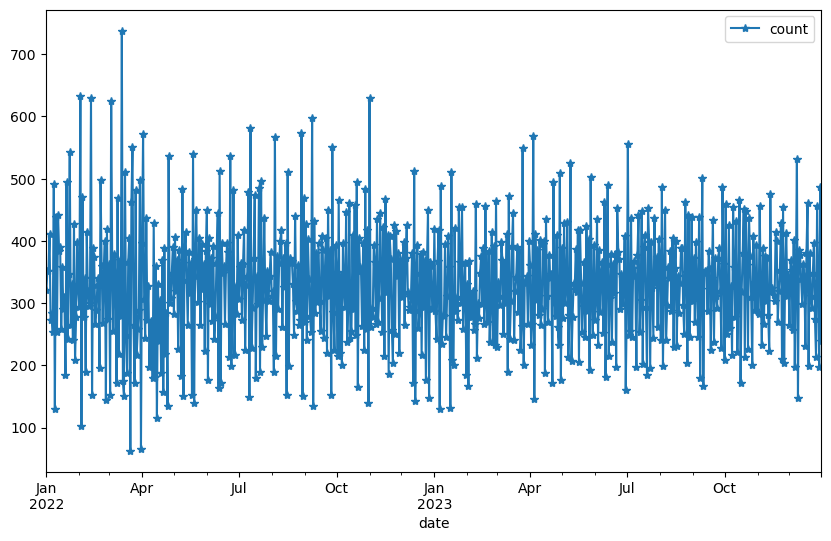

In [4]:
# Look at availability in the area and time period of interest
df = repo.get_daily_count(area=area_str, start_time=start,end_time=end)
df.plot(marker="*", figsize=(10,6));

In [5]:
# Download the data
data = repo.get_altimetry_data(area=area_str, start_time=start,end_time=end)
data.df

Succesfully retrieved 240240 records from API in 16.99 seconds


,longitude,latitude,water_level,significant_wave_height,wind_speed,distance_from_land,water_depth,satellite,quality,absolute_dynamic_topography,water_level_rms,significant_wave_height_raw,significant_wave_height_rms,wind_speed_raw,wind_speed_rads,quality_swh,quality_water_level,quality_wind_speed
datetime,,,,,,,,,,,,,,,,,,
2022-01-01 04:49:18.909,5.917604,49.946692,NaN,21.179,5.568,0.0,480.75,sa,2,NaN,NaN,21.378,30.850,5.621,5.11,2,2,2
2022-01-01 04:49:24.105,5.784601,50.248419,NaN,6.978,0.763,0.0,563.07,sa,2,NaN,NaN,7.006,6.965,1.075,1.06,2,2,2
2022-01-01 04:50:07.682,4.610102,52.773956,0.678,1.185,4.863,3209.0,-12.00,sa,2,0.362,0.031,1.143,0.335,4.954,4.53,2,2,2
2022-01-01 04:50:08.723,4.580665,52.834149,0.757,0.975,6.724,7356.0,-16.04,sa,1,0.359,0.041,0.931,0.303,6.715,6.17,1,1,1
2022-01-01 04:50:09.763,4.551158,52.894336,0.806,1.090,6.848,10841.0,-20.03,sa,1,0.332,0.039,1.047,0.291,6.832,6.29,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:43:46.000,6.318397,55.704622,-0.023,2.535,11.800,112175.0,-41.75,3a,0,-0.019,0.067,2.535,0.476,11.754,11.54,0,0,0
2023-12-31 20:43:47.000,6.286268,55.761878,-0.032,2.732,11.330,115080.0,-43.00,3a,0,-0.029,0.057,2.732,0.390,11.289,11.07,0,0,0
2023-12-31 20:43:48.000,6.254057,55.819127,-0.045,2.712,11.330,117963.0,-44.52,3a,0,-0.040,0.063,2.712,0.250,11.289,11.08,0,0,0


In [6]:
# Take relevant data
wl_df = data.df.loc[:,["longitude","latitude","water_level","satellite","quality_water_level"]]
wl_df.index.names = ['datetime_UTC']
wl_df

,longitude,latitude,water_level,satellite,quality_water_level
datetime_UTC,,,,,
2022-01-01 04:49:18.909,5.917604,49.946692,NaN,sa,2
2022-01-01 04:49:24.105,5.784601,50.248419,NaN,sa,2
2022-01-01 04:50:07.682,4.610102,52.773956,0.678,sa,2
2022-01-01 04:50:08.723,4.580665,52.834149,0.757,sa,1
2022-01-01 04:50:09.763,4.551158,52.894336,0.806,sa,1
...,...,...,...,...,...
2023-12-31 20:43:46.000,6.318397,55.704622,-0.023,3a,0
2023-12-31 20:43:47.000,6.286268,55.761878,-0.032,3a,0
2023-12-31 20:43:48.000,6.254057,55.819127,-0.045,3a,0


In [7]:
# Filter in quality flag and distance from land (to only get water areas)
wl_df_filtered = wl_df[(data.df.loc[:,"quality_water_level"] < 2) & (data.df.loc[:,"distance_from_land"]>0.0)]
wl_df_filtered

,longitude,latitude,water_level,satellite,quality_water_level
datetime_UTC,,,,,
2022-01-01 04:50:08.723,4.580665,52.834149,0.757,sa,1
2022-01-01 04:50:09.763,4.551158,52.894336,0.806,sa,1
2022-01-01 04:50:10.804,4.521582,52.954518,0.850,sa,1
2022-01-01 04:50:11.845,4.491935,53.014693,0.867,sa,1
2022-01-01 04:50:12.885,4.462218,53.074862,0.895,sa,0
...,...,...,...,...,...
2023-12-31 20:43:46.000,6.318397,55.704622,-0.023,3a,0
2023-12-31 20:43:47.000,6.286268,55.761878,-0.032,3a,0
2023-12-31 20:43:48.000,6.254057,55.819127,-0.045,3a,0


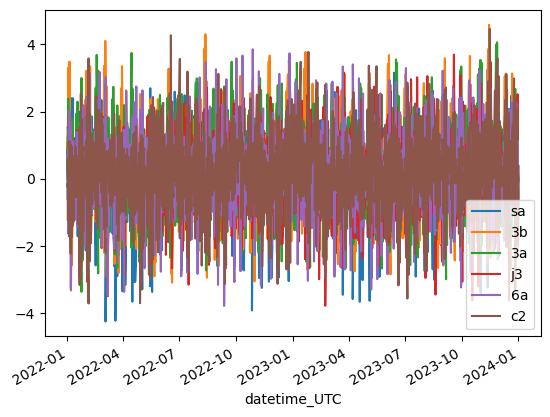

In [8]:
# Plot availability of data
for s in wl_df_filtered.satellite.unique():
    wl_df_filtered[wl_df_filtered.satellite == s].loc[:,"water_level"].plot(label=s)
plt.legend()

In [9]:
# Save data
sats=wl_df_filtered["satellite"].unique()

for sat in sats:
    df = wl_df_filtered.loc[wl_df_filtered["satellite"] == sat].drop(columns=["satellite"])
    df.to_csv(f"../observations/Altimetry_wl_{sat}.csv", date_format='%Y-%m-%dT%H:%M:%S.%f')